In [3]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [6]:
example_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

#example_dataset

I0000 00:00:1735426110.418690    8403 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
for (img, label) in example_dataset:
    print(img.numpy().shape, label.numpy())
    break
    

(28, 28) 5


In [8]:
def normalize_img(image, label):
    return (tf.cast(image, tf.float32)/255.0, label)

example_dataset = example_dataset.map(normalize_img,num_parallel_calls=tf.data.AUTOTUNE)

example_dataset

<_ParallelMapDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [9]:
example_dataset = example_dataset.cache()

In [10]:
example_dataset = example_dataset.shuffle(len(example_dataset))


In [11]:
example_dataset = example_dataset.batch(64)
for (img, label) in example_dataset:
    print(img.numpy().shape, label.numpy())
    break

(64, 28, 28) [3 5 2 7 6 1 7 7 4 7 4 2 5 3 3 8 6 6 8 0 8 1 7 6 0 4 7 3 3 7 3 2 9 8 1 8 3
 6 9 1 4 7 0 6 0 4 6 2 9 0 1 5 3 8 0 4 0 5 2 4 3 9 5 5]


In [12]:
example_dataset = example_dataset.prefetch(tf.data.AUTOTUNE)

example_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.cache()

train_dataset = train_dataset.shuffle(len(train_dataset))
train_dataset = train_dataset.batch(64)

train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [14]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(64)
test_dataset = test_dataset.cache()

test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.InputLayer(input_shape=(28, 28)))
model.add(layers.Reshape((28,28, 1))) #Convolutional NN requires 3D ?
#Build convolutional layers
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
#Build NN
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #softmax to predict probablities

model.summary()



/home/ari/.local/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 8)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,146 (20.10 KB)

 Trainable params: 5,146 (20.10 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(loss=SparseCategoricalCrossentropy(), 
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

In [18]:
model.fit(
    train_dataset,
    epochs=100,
    validation_data = test_dataset,
    callbacks=[es]
)

Epoch 1/100


I0000 00:00:1735426117.069253    8666 service.cc:148] XLA service 0x7f4528013dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735426117.069549    8666 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-12-28 22:48:37.124688: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735426117.429112    8666 cuda_dnn.cc:529] Loaded cuDNN version 90300


 25/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1182 - loss: 2.2972

I0000 00:00:1735426120.734930    8666 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2865 - loss: 1.8936 - val_accuracy: 0.6000 - val_loss: 1.0541
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6625 - loss: 0.9257 - val_accuracy: 0.7854 - val_loss: 0.6415
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7980 - loss: 0.6077 - val_accuracy: 0.8494 - val_loss: 0.4677
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8495 - loss: 0.4759 - val_accuracy: 0.8852 - val_loss: 0.3784
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8813 - loss: 0.3870 - val_accuracy: 0.9115 - val_loss: 0.2987
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9037 - loss: 0.3178 - val_accuracy: 0.9149 - val_loss: 0.2884
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9073 - loss: 0.3046 - val_accuracy: 0.9288 - val_loss: 0.2423
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9219 - loss: 0.2593 - val_accuracy: 0.924

In [19]:
print(model.predict(X_test)[:2])
print(np.argmax(model.predict(X_test)[1]))
print(y_test[0])
print(y_test[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s -27us/step
0
7
2


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
7 
Y test = 7


(28, 28)

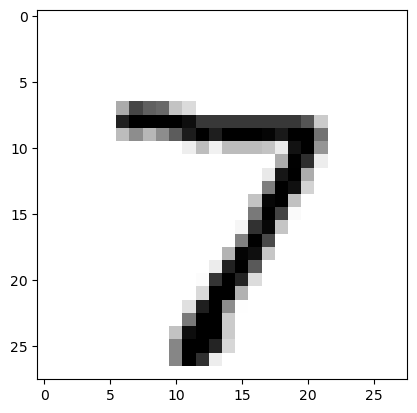

In [24]:
import matplotlib.pyplot as plt

i = 0
plt.imshow((X_test)[i], cmap=plt.cm.binary)
predA = (model.predict(X_test)[i])
pred = np.argmax(predA)

print(f"{predA} \n{pred} \nY test = {y_test[i]}")

X_test[i].shape

In [21]:
model.save('test_model.keras')

In [22]:
model.evaluate(test_dataset)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9582 - loss: 0.1346


[0.11078452318906784, 0.965499997138977]

In [23]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
